In [11]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [12]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [13]:
len (X_train)

60000

In [14]:
len(X_test)

10000

In [15]:
X_train[0].shape

(28, 28)

# That means our data is 28 * 28 pixel image 
## i.e simple 2 dimension array, look below


In [16]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# 0 means black 255  means white , these are the 0 to 255
# we can also see this , we have libray matplot

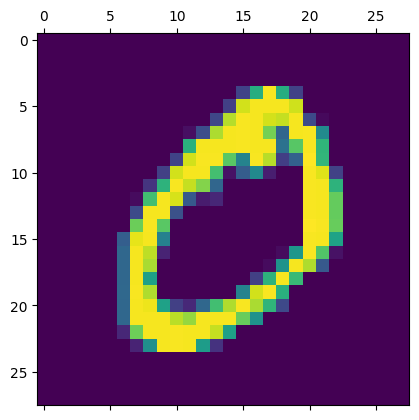

In [18]:
plt.matshow(X_train[1])

## and there y train at the same place is 0.

In [20]:
y_train[1]

np.uint8(0)

## We divide by 255 to normalize pixel values (0–255) into the range [0–1], because:

🧠 Neural networks learn better with small input values

⚡ Faster and more stable training

🎯 Improves accuracy and performance

Without it, the model struggles to learn and gives poor results.

In [40]:
X_train=X_train/255
X_test=X_test/255

## We flatten 2D image data (like 28x28) into 1D (784) because dense neural networks require input as a 1D vector. Each pixel becomes one feature.

## Drawback:Flattening loses the spatial structure of the image (e.g., nearby pixel relationships), which is important for understanding shapes. That's why CNNs are better for image tasks — they keep the 2D structure.
### but here we are using as 1d dense neural

In [41]:
X_train.reshape(len(X_train),28*28)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## bacially what we are doing is here is that we are flateing 60000 thousand image which 28*28 pixel

In [42]:
X_train_flattend=X_train.reshape(len(X_train),28*28)

In [43]:
X_train_flattend.shape

(60000, 784)

In [44]:
X_test_flattend=X_test.reshape(len(X_test),28*28)

In [45]:
X_test_flattend.shape

(10000, 784)

# Now we create the simple neural network, sequnetial means we are using stack of layers in my  neural network, so it will take every layer as  one element

# dense means all the neurons in 1 layer is connected to second layer
## keras.Sequential([...]): Creates a linear stack of layers.
### Dense(10, ...): Adds a fully connected layer with 10 output neurons (for digits 0–9).
### input_shape=(784,): Tells the model each input is a 784-length vector (flattened 28x28 image).
### activation='sigmoid': Applies the sigmoid activation function.



In [46]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattend, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8155 - loss: 0.7137
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9159 - loss: 0.3024
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9208 - loss: 0.2848
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9223 - loss: 0.2750
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9274 - loss: 0.2616


## acuracy is 92%

# Now testing

In [51]:
model.evaluate(X_test_flattend,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9125 - loss: 0.3064


[0.2701161205768585, 0.925599992275238]

## it is also giving us same 92 %

### just doing fun sample prediction


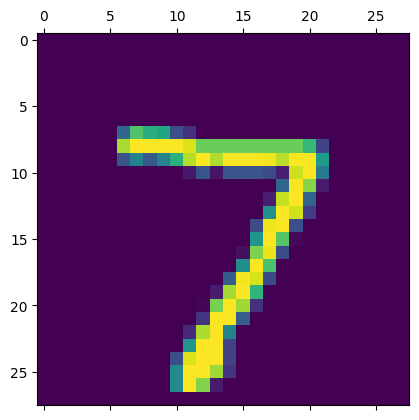

In [52]:
plt.matshow(X_test[0])

In [57]:
y_predicted=model.predict(X_test_flattend)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([2.6967371e-02, 4.6587564e-07, 4.3477882e-02, 9.6003461e-01,
       2.9389514e-03, 1.2046754e-01, 5.7581195e-07, 9.9983090e-01,
       8.7721124e-02, 6.6726613e-01], dtype=float32)

## This means:

Your model predicted probabilities for each digit (0 to 9).

Each value is the probability that the input image is that digit.
Use argmax() to find the index of the highest probability:

In [58]:
np.argmax(y_predicted[0])

np.int64(7)

### same as igmae shown above

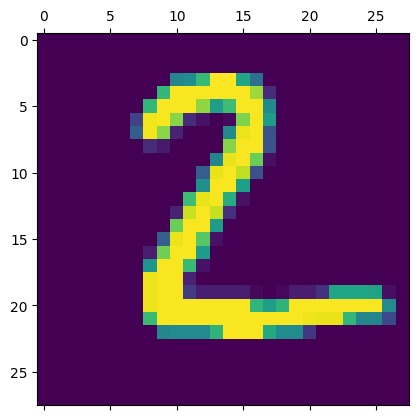

In [59]:
plt.matshow(X_test[1])

In [60]:
y_predicted[1]

array([4.7017154e-01, 8.4494045e-03, 9.9935073e-01, 3.6849982e-01,
       8.6721841e-10, 8.4404612e-01, 7.9939580e-01, 1.1945054e-12,
       1.5878993e-01, 4.0591495e-09], dtype=float32)

In [61]:
np.argmax(y_predicted[1])

np.int64(2)